<a href="https://colab.research.google.com/github/Preranakh/DeepLearningProjects_Udemy/blob/main/Tomato_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
# -*- coding: utf-8 -*-
"""Tomatodisease.ipynb

"""

#!pip install tensorflow-gpu. run this as well for the first time

from tensorflow import keras
from keras.utils.vis_utils import plot_model
from keras.applications.inception_v3 import InceptionV3
from glob import glob
from keras.layers import Flatten,Dense
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator,img_to_array,array_to_img,load_img


In [14]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
IMAGE_SIZE = [224,224]
train_path = "/content/drive/MyDrive/ColabNotebooks/DeepLearningProjects_Datasets/TomatoDiseasePrediction/train"
valid_path = "/content/drive/MyDrive/ColabNotebooks/DeepLearningProjects_Datasets/TomatoDiseasePrediction/val"


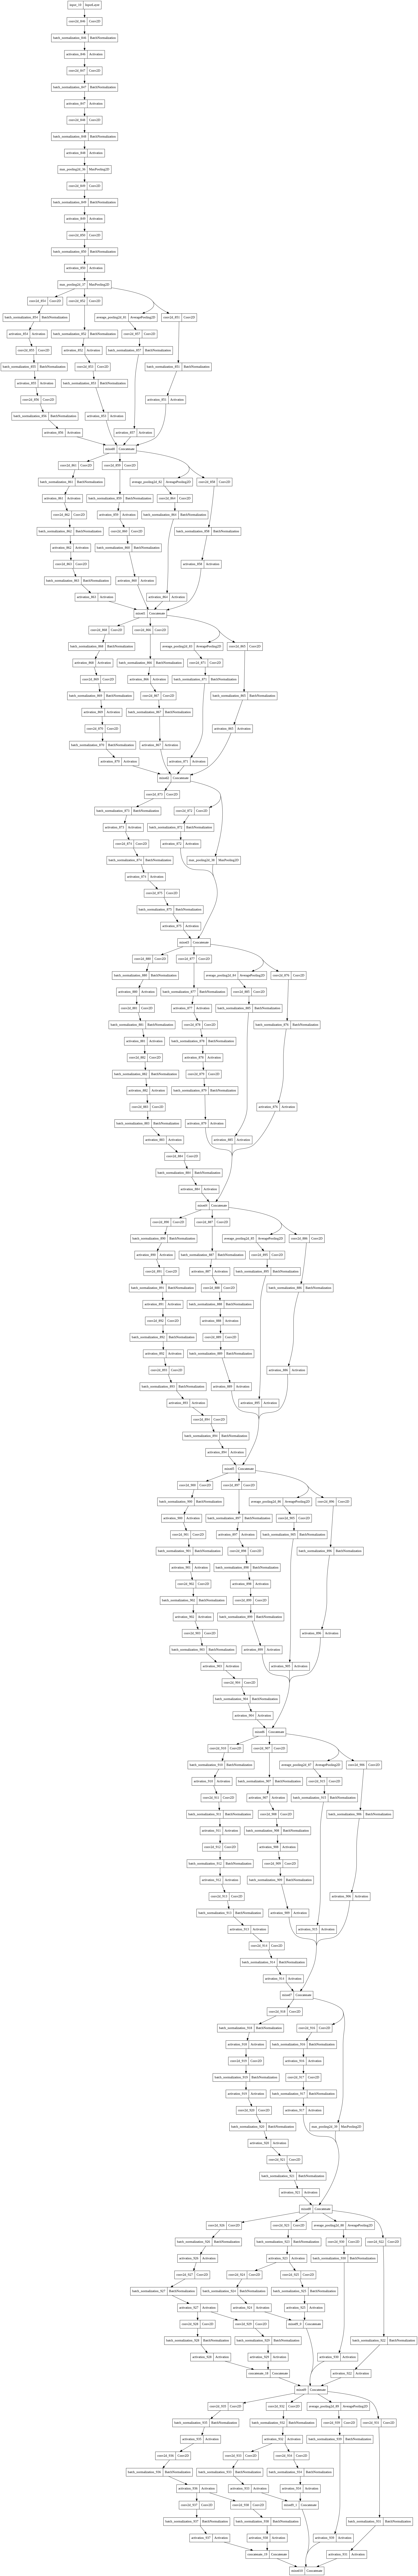

In [16]:
#creating the inception layer
inception = InceptionV3(include_top=False,weights='imagenet',input_shape=IMAGE_SIZE + [3])
plot_model(inception,to_file='model.png')
plot_model(inception)


In [18]:
#avoid training existing weights
for layer in inception.layers:
  layer.trainable = False

#will be used as no. of output layers
folders = glob('/content/drive/MyDrive/ColabNotebooks/DeepLearningProjects_Datasets/TomatoDiseasePrediction/train/*')

folders

#flatten the output of inception model
x = Flatten()(inception.output)

prediction = Dense(len(folders),activation='softmax')(x)

#create model
model = Model(inputs=inception.input,outputs = prediction)
plot_model(model)

model.summary()

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

train_datagen = ImageDataGenerator(rescale=1./255,shear_range=0.2,horizontal_flip=True,zoom_range=0.2)
test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/ColabNotebooks/DeepLearningProjects_Datasets/TomatoDiseasePrediction/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = train_datagen.flow_from_directory('/content/drive/MyDrive/ColabNotebooks/DeepLearningProjects_Datasets/TomatoDiseasePrediction/val',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)
